In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from collections import Counter

from EqualGroupsKMeans import equal_group_kmeans

random_state = 1017
np.random.seed(random_state)


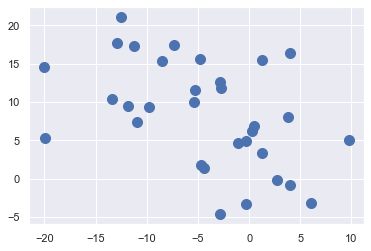

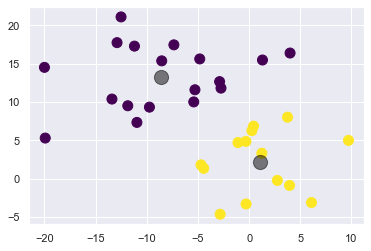

Group sizes: Counter({0: 18, 1: 14})
Unequal group sizes
n: 32, n_g: 2, group_sizes: [16, 16]


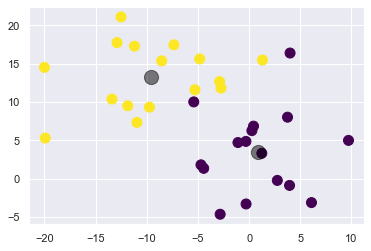

Group sizes: Counter({1: 16, 0: 16})


In [4]:
# Testing with the BLOB example

n_samples = 32
n_groups = 2
n_members = 16

# ensure that the calculus works out
assert n_groups * n_members == n_samples

X, y_true = make_blobs(n_samples=n_samples, centers=n_groups,
                       cluster_std=6, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], s=100);
plt.show()

kmeans = KMeans(n_clusters=n_groups, n_init=100, max_iter=1000)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

# test the group size, AssertionError on failure
C = Counter(labels)
print('Group sizes: {}'.format(C))

try:
  assert list(C.values()) == [n_members] * n_groups
except AssertionError as e:
  print('Unequal group sizes')

(centers, labels, interia, group_sizes, 
 n_iter) = equal_group_kmeans(X, n_groups, max_iter=100)
print('n: {}, n_g: {}, group_sizes: {}'.format(n_samples, n_groups, group_sizes))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

# test the group size, AssertionError on failure
C = Counter(labels)
print('Group sizes: {}'.format(C))

try:
  assert list(C.values()) == [n_members] * n_groups
except AssertionError as e:
  print('Unequal group sizes')

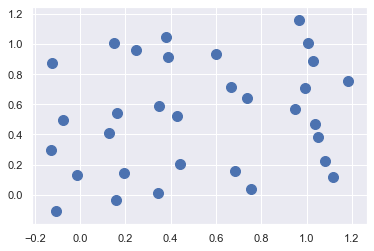

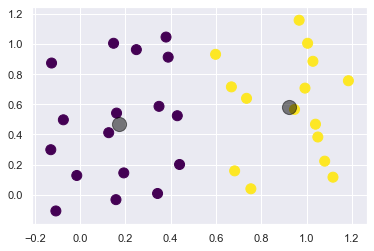

Group sizes: Counter({0: 17, 1: 15})
Unequal group sizes
n: 32, n_g: 2, group_sizes: [16, 16]


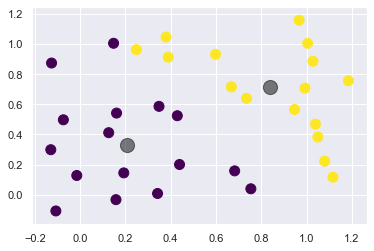

Group sizes: Counter({0: 16, 1: 16})


In [5]:
# Testing with the BOX example

nx, ny = 4, 8
xs = np.linspace(0, 1, nx)
ys = np.linspace(0, 1, ny)
x, y = np.meshgrid(xs, ys) + np.random.normal(scale=0.2, size=(ny, nx))

X = np.zeros(shape=(len(x.flatten()), 2))
X[:, 0] = x.flatten()
X[:, 1] = y.flatten()

plt.scatter(X[:, 0], X[:, 1], s=100);
plt.show()

kmeans = KMeans(n_clusters=n_groups, n_init=100, max_iter=1000)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

# test the group size, AssertionError on failure
C = Counter(labels)
print('Group sizes: {}'.format(C))

try:
  assert list(C.values()) == [n_members] * n_groups
except AssertionError as e:
  print('Unequal group sizes')

(centers, labels,interia, group_sizes, 
 n_iter) = equal_group_kmeans(X, n_groups, max_iter=100)
print('n: {}, n_g: {}, group_sizes: {}'.format(n_samples, n_groups, group_sizes))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

# test the group size, AssertionError on failure
C = Counter(labels)
print('Group sizes: {}'.format(C))

try:
  assert list(C.values()) == [n_members] * n_groups
except AssertionError as e:
  print('Unequal group sizes')